# Visualization
## Imports

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import sys
sys.path.append('../')

## Seaborn settings

In [15]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

## Import data frames

In [16]:
pl = pd.read_csv('./output/pl.csv')
m=pd.read_csv('./data/meets.csv',encoding="ISO-8859-1")
df3 = pd.read_csv('./output/w_fat.csv')
scr = pd.read_csv('./output/scrap.csv')

## Base data frame
### we work with this one

In [4]:
pl.head(3)

,MeetID,Name,Sex,Equipment,Age,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks,Division,Date,Squat%,Bench%,Dead%,Total%
0,0,Angie Belk Terry,F,Wraps,47.0,59.60,60,47.63,20.41,70.31,138.35,1,155.05,Mst 45-49,10/29/16,0.799,0.342,1.180,2.321
1,0,Dawn Bogart,F,Single-ply,42.0,58.51,60,142.88,95.25,163.29,401.42,1,456.38,Mst 40-44,10/29/16,2.442,1.628,2.791,6.861
2,0,Dawn Bogart,F,Raw,42.0,58.51,60,0.00,95.25,0.00,95.25,1,108.29,Open Senior,10/29/16,0.000,1.628,0.000,1.628


### Male and female participation
we take every entry making no considerations

<AxesSubplot:xlabel='Sex', ylabel='count'>

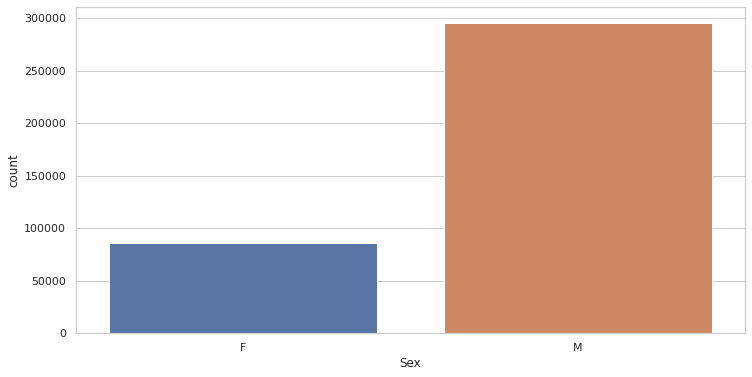

In [5]:
sns.countplot(x=pl.Sex)

### One person gets one entry here
same person with different weight is considered twice

In [17]:
pl_s = pl.drop_duplicates(subset=['Name', 'BodyweightKg'])
#without repetition

## Weight distribution for male and female

<AxesSubplot:xlabel='Sex', ylabel='BodyweightKg'>

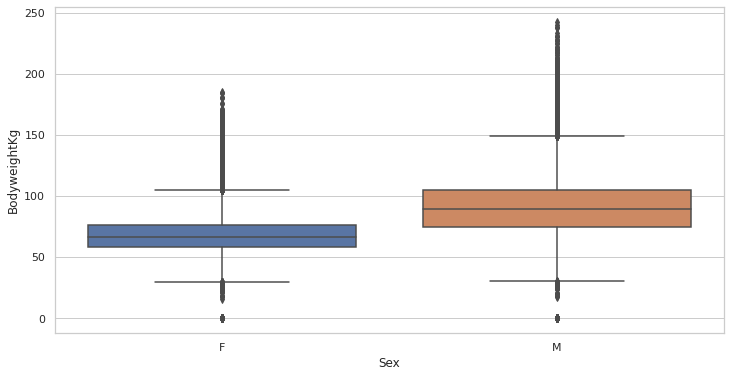

In [15]:
sns.boxplot(x="Sex", y="BodyweightKg", data=pl_s)

## subsets
### Lots of subsets
#### Many people take part in only one or two exercises so joined plots are tricky
### Male / Female

In [18]:
pl_f = pl[pl["Sex"] == "F"]
pl_m = pl[pl["Sex"] == "M"]
#without repetition
pl_sf = pl_s[pl_s["Sex"] == "F"]
pl_sm = pl_s[pl_s["Sex"] == "M"]

### bench / squat / dead  / all

In [19]:
pl_bench = pl[pl["BestBenchKg"] != 0]
pl_squat = pl[pl["BestSquatKg"] != 0]
pl_dead = pl[pl["BestDeadliftKg"] != 0]
pl_all = pl[(pl["BestBenchKg"] != 0)&(pl["BestSquatKg"] != 0)&(pl["BestDeadliftKg"] != 0)]

### (bench / squat / dead) / sex

In [20]:
#female
pl_f_bench = pl_f[pl_f["BestBenchKg"] != 0]
pl_f_squat = pl_f[pl_f["BestSquatKg"] != 0]
pl_f_dead = pl_f[pl_f["BestDeadliftKg"] != 0]
#male
pl_m_dead = pl_m[pl_m["BestDeadliftKg"] != 0]
pl_m_bench = pl_m[pl_m["BestBenchKg"] != 0]
pl_m_squat = pl_m[pl_m["BestSquatKg"] != 0]



## discipline by weight
### this could get out of hand fast so I'm just picking the most representative

In [23]:
# male deadlift
pl_m_dead_lw = pl_m_dead[pl_m_dead["BodyweightKg"] < 70.7]
pl_m_dead_mw = pl_m_dead[(pl_m_dead["BodyweightKg"] >= 70.7) &(pl_m_dead["BodyweightKg"] <= 107.7) ]
pl_m_dead_hw = pl_m_dead[pl_m_dead["BodyweightKg"] > 107.7]

#female bench press
pl_f_bench_lw = pl_f_bench[pl_f_bench["BodyweightKg"] < 55]
pl_f_bench_mhw = pl_f_bench[pl_f_bench["BodyweightKg"] >= 55]


## performance across discipline and sex 

<AxesSubplot:xlabel='BestDeadliftKg', ylabel='Sex'>

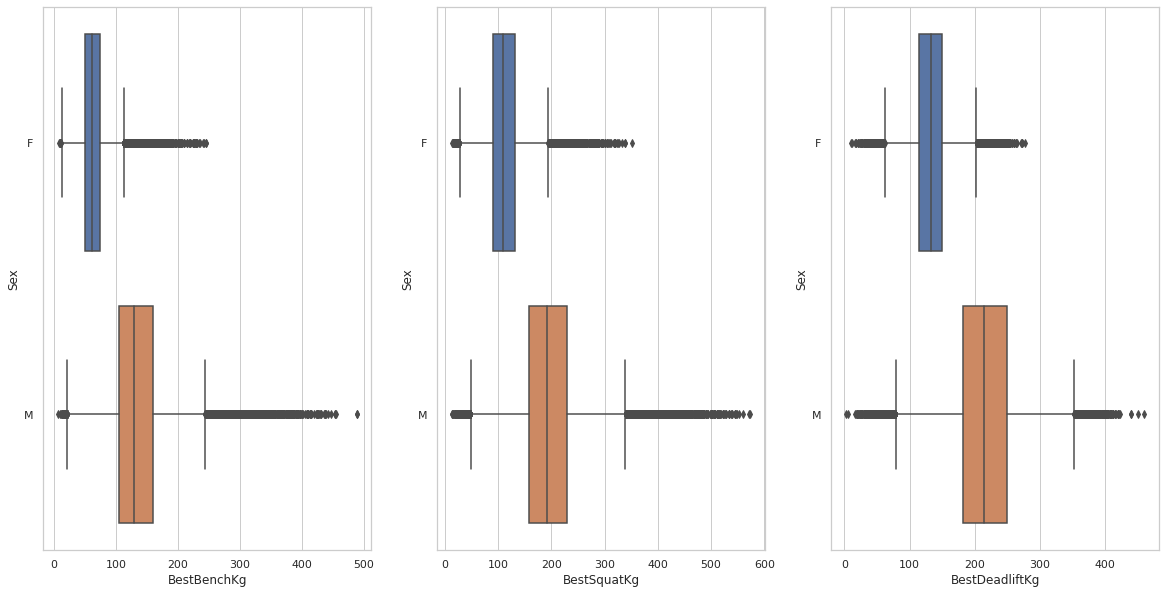

In [22]:
# Creamos una figura y ejes, donde luego accederemos a ellos
#en forma de coordenadas [fila,columna]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
sns.boxplot(x="BestBenchKg",y="Sex", data=pl_bench, ax=axs[0])
sns.boxplot(x="BestSquatKg",y="Sex",  data=pl_squat, ax=axs[1])
sns.boxplot(x="BestDeadliftKg",y="Sex",  data=pl_dead, ax=axs[2])



<AxesSubplot:xlabel='BestDeadliftKg', ylabel='Sex'>

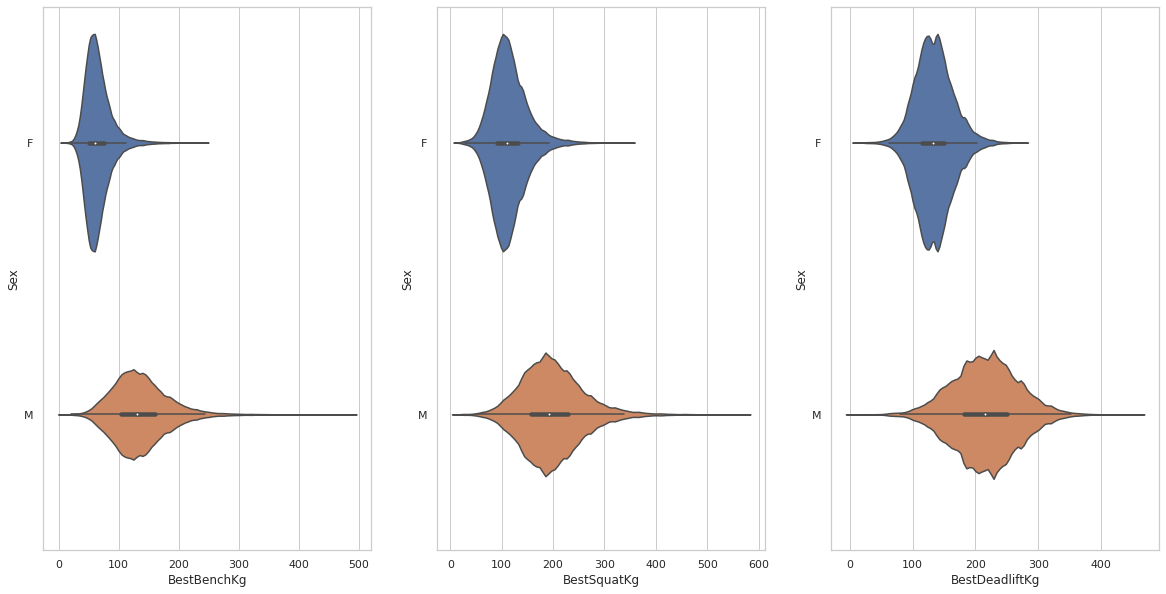

In [23]:
#les make it prettier
fig, axsi = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
sns.violinplot(x=pl_bench.BestBenchKg, y=pl_bench.Sex, ax=axsi[0])
sns.violinplot(x=pl_squat.BestSquatKg, y=pl_squat.Sex, ax=axsi[1])
sns.violinplot(x=pl_dead.BestDeadliftKg, y=pl_dead.Sex, ax=axsi[2])


## correlation to bodyweight across disciplines

<AxesSubplot:xlabel='BodyweightKg', ylabel='BestDeadliftKg'>

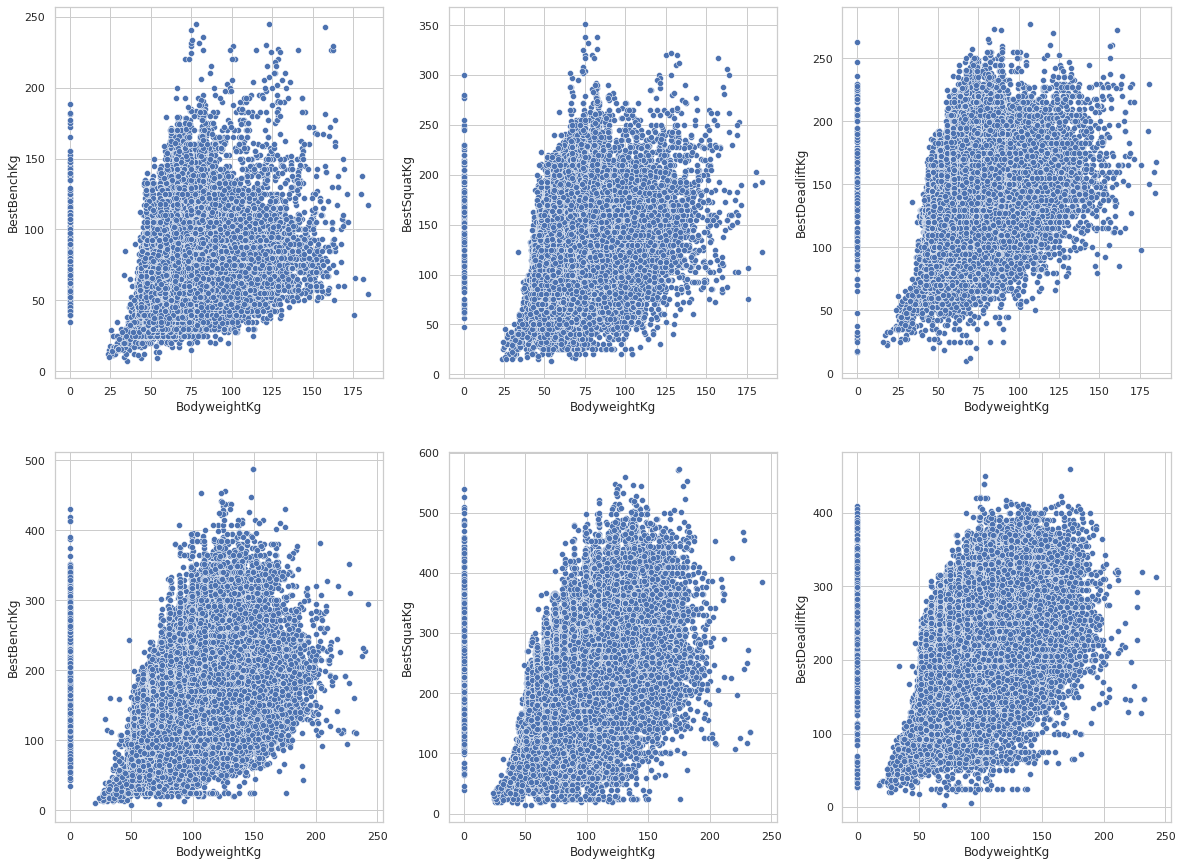

In [12]:
fig, axsq = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
sns.scatterplot(y="BestBenchKg", x="BodyweightKg", data=pl_f_bench, ax=axsq[0,0])
sns.scatterplot(y="BestSquatKg", x="BodyweightKg", data=pl_f_squat, ax=axsq[0,1])
sns.scatterplot(y="BestDeadliftKg",x="BodyweightKg", data=pl_f_dead, ax=axsq[0,2])
sns.scatterplot(y="BestBenchKg",x="BodyweightKg", data=pl_m_bench, ax=axsq[1,0])
sns.scatterplot(y="BestSquatKg",x="BodyweightKg", data=pl_m_squat, ax=axsq[1,1])
sns.scatterplot(y="BestDeadliftKg",x="BodyweightKg", data=pl_m_dead, ax=axsq[1,2])

## Using refined data for body weight

<AxesSubplot:xlabel='BodyweightKg', ylabel='BestBenchKg'>

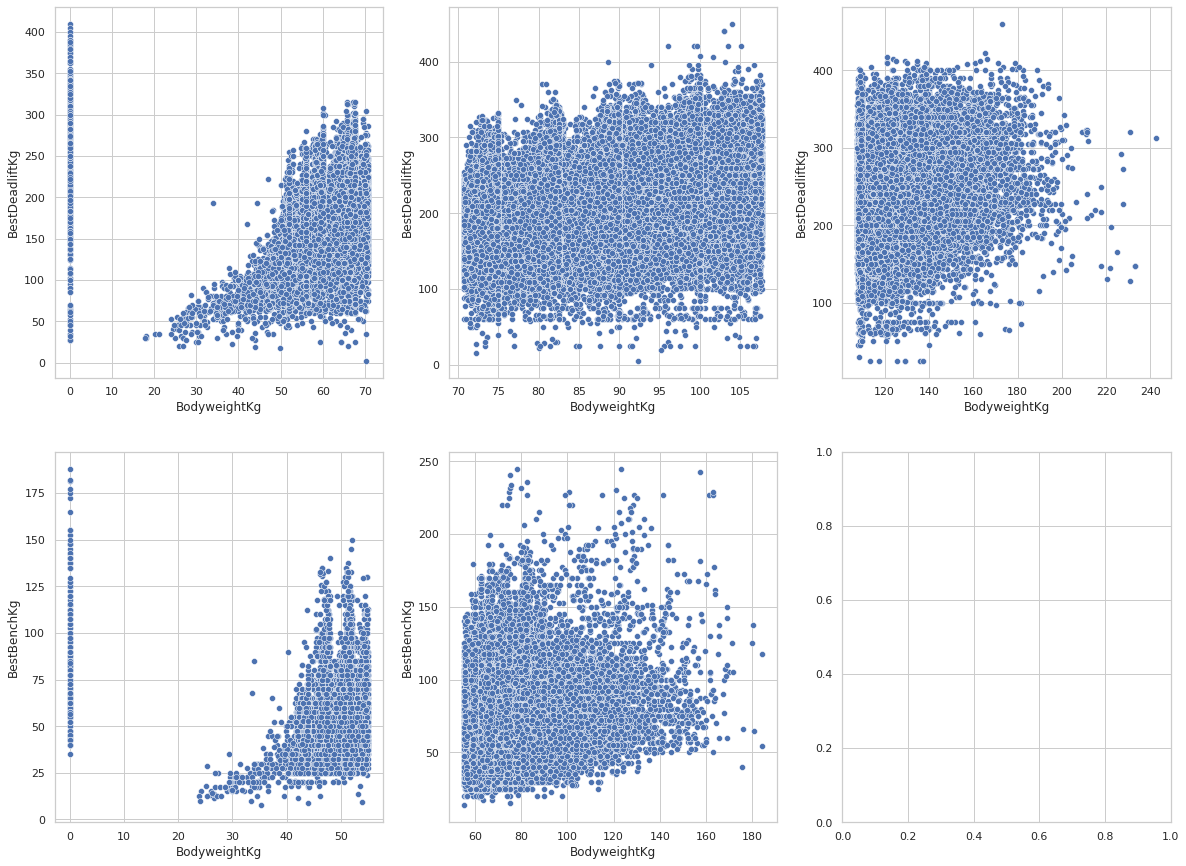

In [24]:
fig, axsq = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
sns.scatterplot(y="BestDeadliftKg", x="BodyweightKg", data=pl_m_dead_lw, ax=axsq[0,0])
sns.scatterplot(y="BestDeadliftKg", x="BodyweightKg", data=pl_m_dead_mw, ax=axsq[0,1])
sns.scatterplot(y="BestDeadliftKg",x="BodyweightKg", data=pl_m_dead_hw, ax=axsq[0,2])
sns.scatterplot(y="BestBenchKg",x="BodyweightKg", data=pl_f_bench_lw, ax=axsq[1,0])
sns.scatterplot(y="BestBenchKg",x="BodyweightKg", data=pl_f_bench_mhw, ax=axsq[1,1])

## Questioning the validity of Wilks points

<AxesSubplot:xlabel='TotalKg', ylabel='Wilks'>

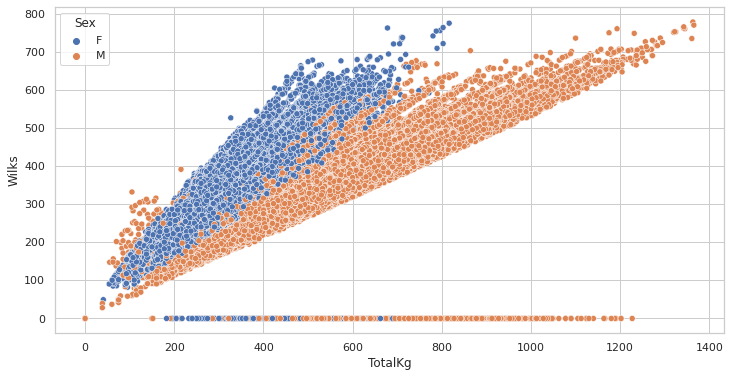

In [26]:
sns.scatterplot(y="Wilks", x="TotalKg", data=pl_all, hue="Sex")


<AxesSubplot:xlabel='BodyweightKg', ylabel='Wilks'>

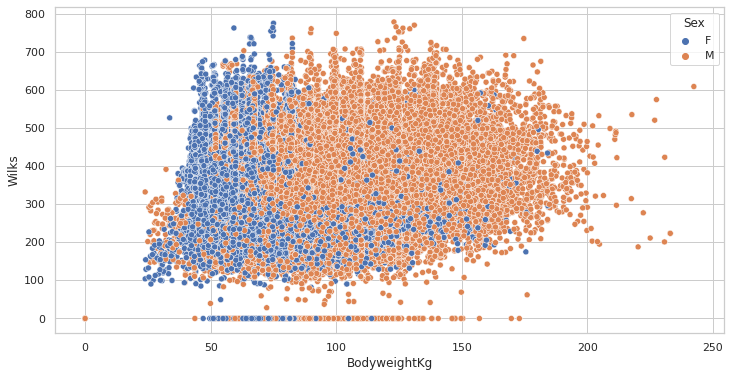

In [27]:
sns.scatterplot(y="Wilks", x="BodyweightKg", data=pl_all, hue="Sex")

## Body weight index for strength
### Across exercise and sex

<AxesSubplot:xlabel='Dead%', ylabel='Count'>

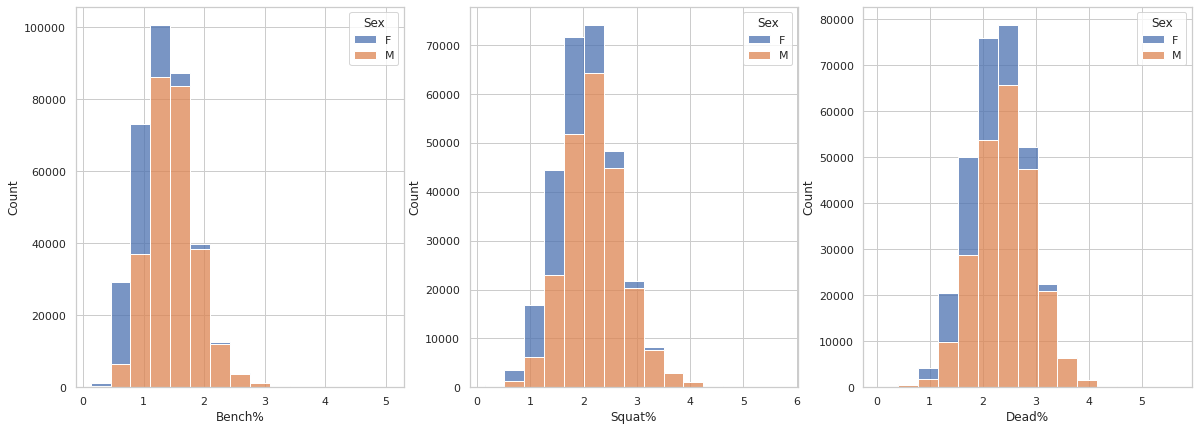

In [25]:
fig, axsq = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
sns.histplot(data=pl_bench, x="Bench%", hue="Sex", multiple="stack",bins=15, ax=axsq[0])
sns.histplot(data=pl_squat, x="Squat%", hue="Sex", multiple="stack",bins=15, ax=axsq[1])
sns.histplot(data=pl_dead, x="Dead%", hue="Sex", multiple="stack",bins=15, ax=axsq[2])



## Using scrapped data

In [11]:
scr.head(3)

,Body_mass_(kg)_,Height_(cm)_,Body_mass_index_(kg.m-2)_,Trunk_fat_mass_(kg)_,Trunk_lean_mass_(kg)_,Left_leg_fat_mass_(kg)_,Left_leg_lean_mass_(kg)_,Right_leg_fat_mass_(kg)_,Right_leg_lean_mass_(kg)_,Left_arm_fat_mass_(kg)_,Left_arm_lean_mass_(kg)_,Right_arm_fat_mass_(kg)_,Right_arm_lean_mass_(kg)_,Total_body_bone_mineral_content_(kg)_,Total_body_protein_content_(kg)_,Total_body_water_(L)_,Total_body_fat_(%)_,Total_body_fat_(kg)_
0,70.7,168.0,24.8,6.0,27.1,1.7,8.5,1.7,8.5,0.5,3.5,0.5,3.5,3.8,11.7,42.7,16.4,11.5
1,87.1,174.7,28.6,9.0,33.1,2.0,10.1,2.0,10.1,0.7,4.6,0.7,4.5,4.7,14.3,52.4,18.0,15.9
2,107.7,172.6,36.3,19.0,35.1,3.9,10.5,4.0,10.5,2.2,4.9,2.5,4.9,4.8,14.9,54.6,30.8,33.4


### body fat % acording to bodyweight

<AxesSubplot:xlabel='Body_mass_(kg)_', ylabel='Total_body_fat_(%)_'>

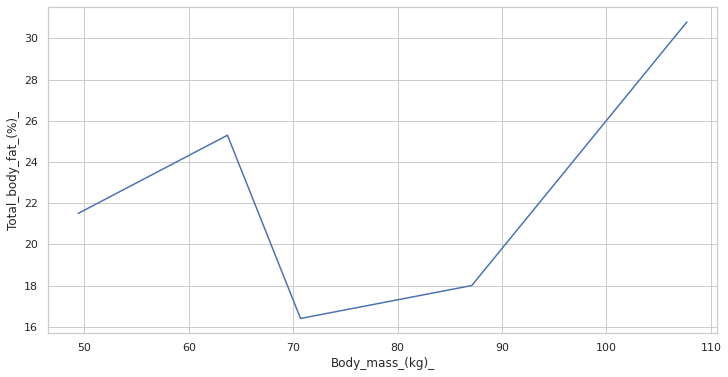

In [5]:
sns.lineplot(data=df3, x="Body_mass_(kg)_", y="Total_body_fat_(%)_")

## Calculating BMR for body weights
### Katch-McArdle Formula:

In [29]:
pl_m_lw = pl_sm[pl_sm["BodyweightKg"] < 70.7]
pl_m_mw = pl_sm[(pl_sm["BodyweightKg"] >= 70.7) &(pl_sm["BodyweightKg"] <= 107.7) ]
pl_m_hw = pl_sm[pl_sm["BodyweightKg"] > 107.7]

pl_f_lw = pl_sf[pl_sf["BodyweightKg"] < 55]
pl_f_mhw = pl_sf[pl_sf["BodyweightKg"] >= 55]

In [34]:
pl_m_lw["BMR"] =pl_m_lw.BodyweightKg.apply(lambda x : 370 + 21.6*(1 - 0.164)*x)
pl_m_mw ["BMR"] =pl_m_mw.BodyweightKg.apply(lambda x : 370 + 21.6*(1 - 0.18)*x)
pl_m_hw ["BMR"] =pl_m_hw.BodyweightKg.apply(lambda x : 370 + 21.6*(1 - 0.30)*x)

pl_f_lw ["BMR"] =pl_f_lw.BodyweightKg.apply(lambda x : 370 + 21.6*(1 - 0.215)*x)
pl_f_mhw ["BMR"] =pl_f_mhw.BodyweightKg.apply(lambda x : 370 + 21.6*(1 - 0.253)*x)

/tmp/ipykernel_4752/4131554477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl_m_lw["BMR"] =pl_m_lw.BodyweightKg.apply(lambda x : 370 + 21.6*(1 - 0.164)*x)
/tmp/ipykernel_4752/4131554477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl_m_mw ["BMR"] =pl_m_mw.BodyweightKg.apply(lambda x : 370 + 21.6*(1 - 0.18)*x)
/tmp/ipykernel_4752/4131554477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



<AxesSubplot:xlabel='BMR', ylabel='Count'>

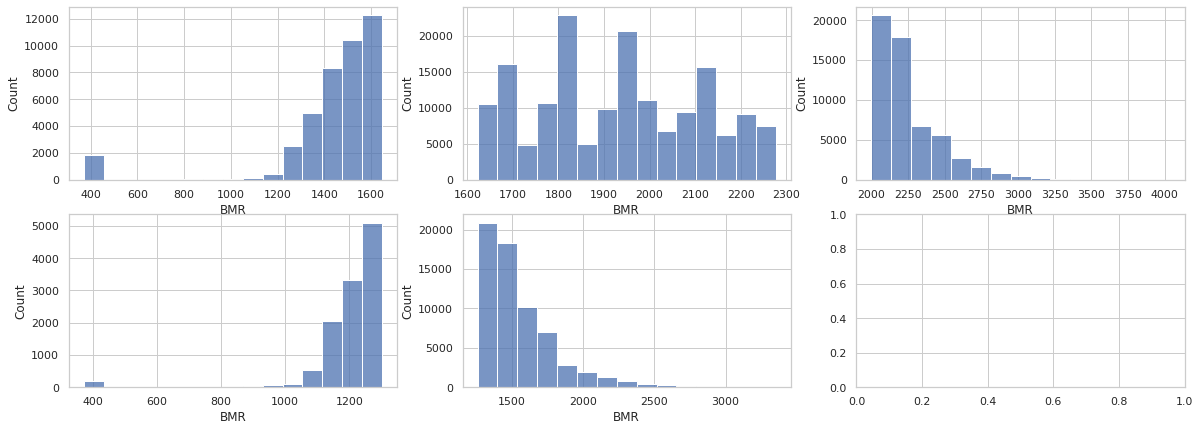

In [41]:
fig, axsq = plt.subplots(nrows=2, ncols=3, figsize=(20,7))
sns.histplot(data=pl_m_lw, x="BMR",bins=15, ax=axsq[0,0])
sns.histplot(data=pl_m_mw, x="BMR",bins=15, ax=axsq[0,1])
sns.histplot(data=pl_m_hw, x="BMR", bins=15, ax=axsq[0,2])
sns.histplot(data=pl_f_lw, x="BMR", bins=15, ax=axsq[1,0])
sns.histplot(data=pl_f_mhw, x="BMR", bins=15, ax=axsq[1,1])

### mean values

In [40]:
display(
    pl_m_lw["BMR"].mean(),pl_m_mw ["BMR"].mean(),pl_m_hw ["BMR"].mean(), pl_f_lw ["BMR"].mean(),pl_f_mhw ["BMR"].mean())

1435.7023687942954

1931.7626733534769

2247.917333518424

1203.6946422455408

1546.5104862349544